In [14]:
# !pip install pandas
# !pip install numpy
# pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

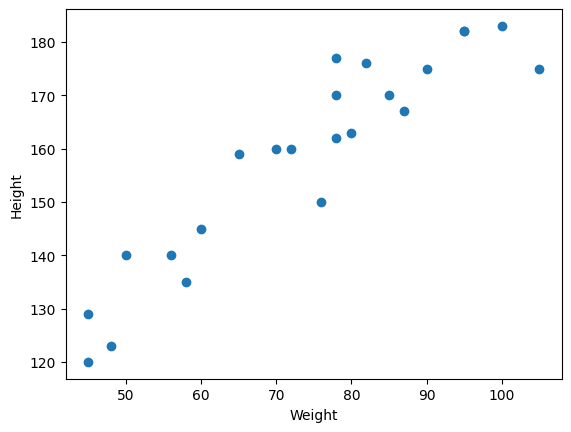

In [16]:
##Scatter plot

plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [17]:
## Correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [18]:
## Seaborn fro visualization

# import seaborn as sns
# sns.pairplot(df)

In [19]:
## Independent and dependent feature

# df.head()
x = df[["Weight"]]   ### independant feature should be data frame or 2D array
y = df['Height']    ### this variable can be in series form of in 1D array

In [23]:
## Train test split
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.2 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.2 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.2 MB 3.4 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.2 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.2 MB 3.5 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.2 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.2 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.2 MB 3.8 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.2 MB 3.9 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.2 MB 4.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.2 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.2 MB 3.9 MB/s eta 0:00:01
   ---

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [25]:
x_train.shape

(17, 1)

In [26]:
x_test.shape

(6, 1)

In [27]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [28]:
## apply Simple Liner Regression

from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression(n_jobs=-1)

regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
print("Coefficient or slop: ",regression.coef_  )     ## slop

Coefficient or slop:  [17.2982057]


In [31]:
print("Intercept: ",regression.intercept_  )

Intercept:  156.47058823529412


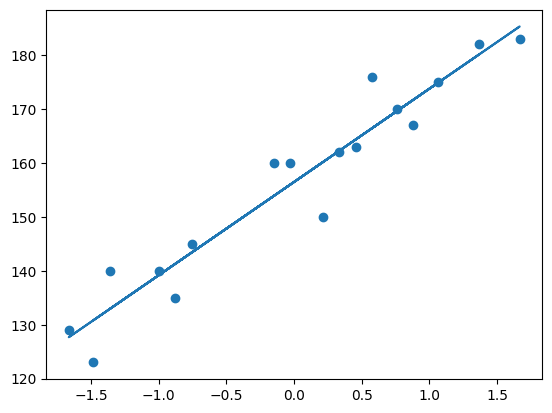

In [32]:
## plot Training data plot BFL
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [33]:
## prediction for test data

y_pred = regression.predict(x_test)

In [34]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [36]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [37]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

#### OLS Linear regression

In [39]:
# !pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.9 MB 5.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.9 MB 6.6 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 6.2 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.9 MB 6.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 6.6 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 5.2 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 5.1 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [sta

In [40]:
import statsmodels.api as sm

In [41]:
model = sm.OLS(y_train, x_train).fit()

In [42]:
prediction = model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [43]:
print(model.summary())  ## same coef = 17.29 

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 03 Jul 2025   Prob (F-statistic):                       0.664
Time:                        17:54:27   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\ICON\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
##predictipon for new data
regression.predict([[72]]) # wrong


array([1401.94139895])

In [45]:
model.predict([[72]])  # wrong

array([1245.47081071])

In [46]:
regression.predict(scaler.transform([[72]]))

C:\Users\ICON\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])